In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datapackage import Package

In [3]:
package = Package('https://datahub.io/core/employment-us/datapackage.json')

print(package.resource_names)

for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        data = pd.read_csv(resource.raw_iter())
        print(data)
        #print(resource.read())

['validation_report', 'aat1_csv', 'aat1_json', 'employment-us_zip', 'aat1']
    year  population  labor_force  population_percent  employed_total  \
0   1941       99900        55910                56.0           50350   
1   1942       98640        56410                57.2           53750   
2   1943       94640        55540                58.7           54470   
3   1944       93220        54630                58.6           53960   
4   1945       94090        53860                57.2           52820   
..   ...         ...          ...                 ...             ...   
66  2006      228815       151428                66.2          144427   
67  2007      231867       153124                66.0          146047   
68  2008      233788       154287                66.0          145362   
69  2009      235801       154142                65.4          139877   
70  2010      237830       153889                64.7          139064   

    employed_percent  agrictulture_ratio  nonag

In [4]:
data.head()

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990,NaN
1,1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230,NaN
2,1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100,NaN
3,1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590,NaN
4,1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230,NaN


Immediately from the head of the data we can see a misspelling in the column 'agrictulture_ratio' which supposed to be 'agriculture_ratio'.

In [5]:
data.tail()

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
66,2006,228815,151428,66.2,144427,63.1,2206,142221,7001,4.6,77387,1.0
67,2007,231867,153124,66.0,146047,63.0,2095,143952,7078,4.6,78743,1.0
68,2008,233788,154287,66.0,145362,62.2,2168,143194,8924,5.8,79501,1.0
69,2009,235801,154142,65.4,139877,59.3,2103,137775,14265,9.3,81659,1.0
70,2010,237830,153889,64.7,139064,58.5,2206,136858,14825,9.6,83941,1.0


# Data Exploration

### Checking Data

Checking Shape of Data

In [6]:
data.shape

(71, 12)

Checking General Information of Data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  71 non-null     int64  
 1   population            71 non-null     int64  
 2   labor_force           71 non-null     int64  
 3   population_percent    71 non-null     float64
 4   employed_total        71 non-null     int64  
 5   employed_percent      71 non-null     float64
 6   agrictulture_ratio    71 non-null     int64  
 7   nonagriculture_ratio  71 non-null     int64  
 8   unemployed            71 non-null     int64  
 9   unemployed_percent    71 non-null     float64
 10  not_in_labor          71 non-null     int64  
 11  footnotes             21 non-null     float64
dtypes: float64(4), int64(8)
memory usage: 6.8 KB


Checking General Statistic Information

In [8]:
data.describe()

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,21.0
mean,1975.098592,156272.521127,98707.492958,62.230986,93033.577465,58.773239,4456.492958,88577.028169,5673.774648,5.509859,57564.929577,1.0
std,20.486340,44979.642300,33380.727804,3.513793,30992.290437,3.140380,2055.547406,32739.727633,2954.030173,1.818803,11795.889143,0.0
min,1941.000000,93220.000000,53860.000000,55.800000,50350.000000,50.400000,2095.000000,41250.000000,670.000000,1.200000,38590.000000,1.0
25%,1957.500000,112996.000000,67284.000000,59.200000,63935.000000,56.400000,3235.000000,57818.500000,3131.500000,4.350000,45969.000000,1.0
50%,1975.000000,153153.000000,93774.000000,61.300000,86794.000000,57.800000,3440.000000,83279.000000,5692.000000,5.500000,59377.000000,1.0
75%,1992.500000,193821.500000,128652.500000,66.000000,119526.000000,61.950000,5766.500000,116357.000000,7614.000000,6.450000,65169.000000,1.0
max,2010.000000,237830.000000,154287.000000,67.100000,146047.000000,64.400000,9250.000000,143952.000000,14825.000000,9.900000,83941.000000,1.0


Check Missing Value

In [9]:
data.isnull().sum()

year                     0
population               0
labor_force              0
population_percent       0
employed_total           0
employed_percent         0
agrictulture_ratio       0
nonagriculture_ratio     0
unemployed               0
unemployed_percent       0
not_in_labor             0
footnotes               50
dtype: int64

Checking Variable Coorelation

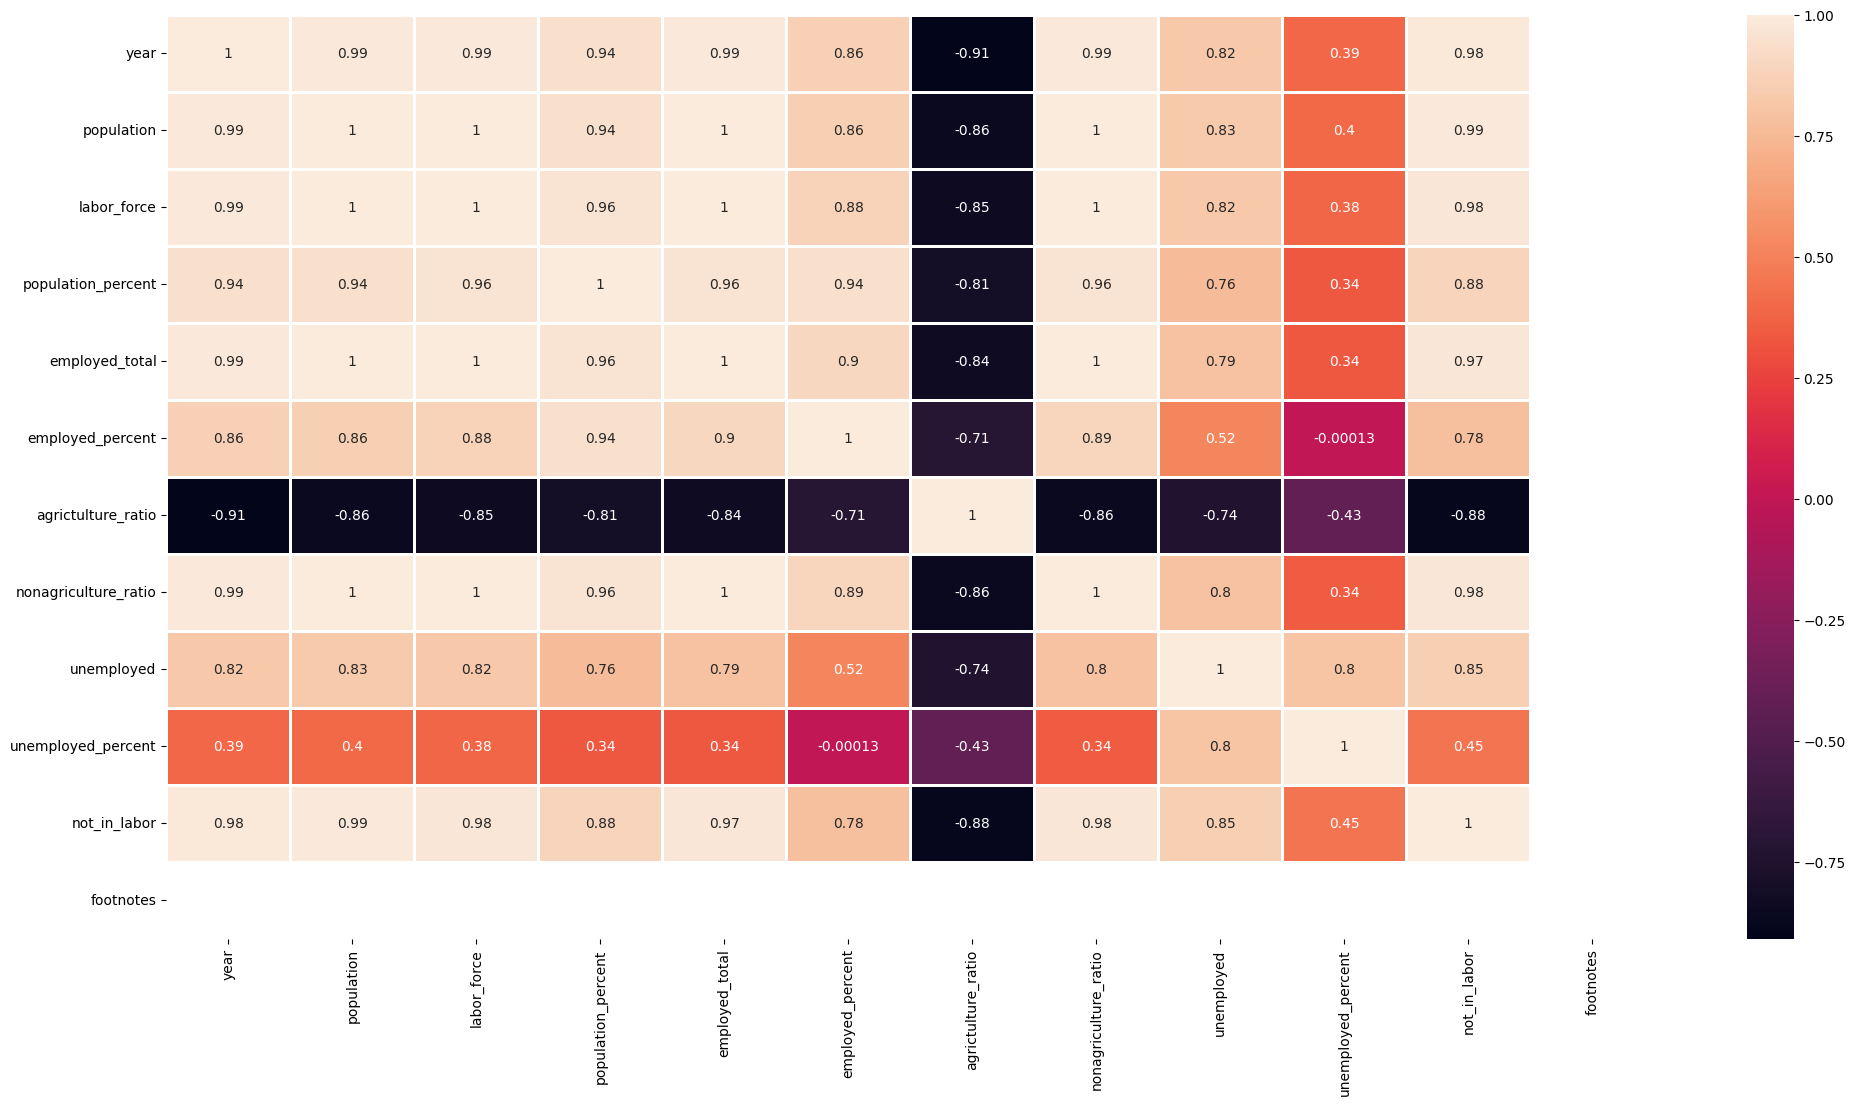

In [10]:
plt.figure(figsize=(24,12))
corr = data.corr()
sns.heatmap(corr, annot = True, linewidths=1)
plt.show()

Based on the correlation map above, we can notice that the year variable has high correlation with almost all the data except for the unemployed_percent with correlation as low as 0.39 and agriculture_ratio which shows little to no correlation even showing a negative correlation  with almost all the variables within the data. This shows us that population, employment rate (based on employed_total and employed_percent)  has been increasing throughout the year, but we can't say the same on the unemployed_percent which shows a weak correlation.

Checking Data Type

In [11]:
data.dtypes

year                      int64
population                int64
labor_force               int64
population_percent      float64
employed_total            int64
employed_percent        float64
agrictulture_ratio        int64
nonagriculture_ratio      int64
unemployed                int64
unemployed_percent      float64
not_in_labor              int64
footnotes               float64
dtype: object

## Univariate Analysis

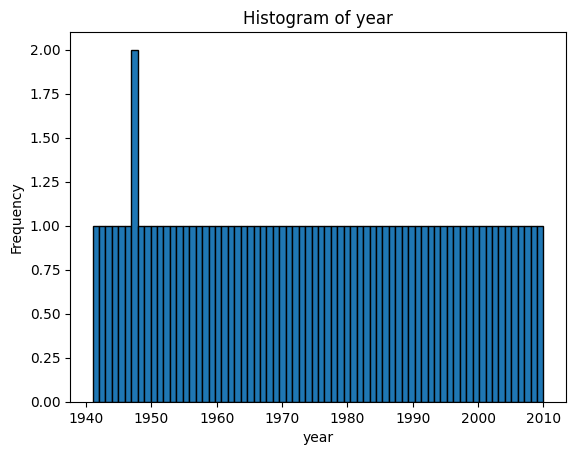

In [12]:
column_to_analyze = 'year'
plt.hist(data[column_to_analyze], bins=70, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('{}'.format(column_to_analyze))
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_to_analyze))
plt.show()

Here we can see that the year there are 2 records with the year 1947.


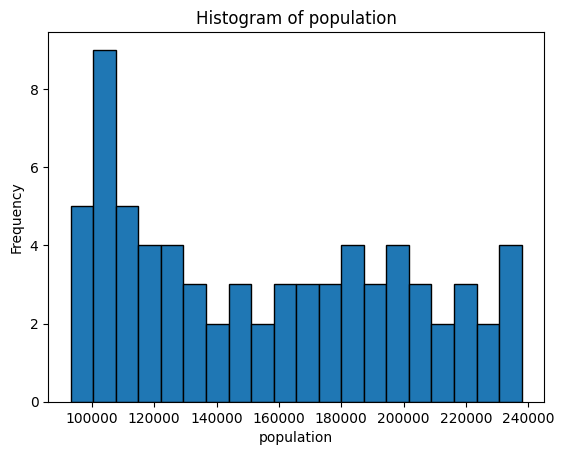

In [13]:
column_to_analyze = 'population'
plt.hist(data[column_to_analyze], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('{}'.format(column_to_analyze))
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_to_analyze))
plt.show()

The chart for population shows a right skewed histogram where there is a abundance of record with population of around 110000

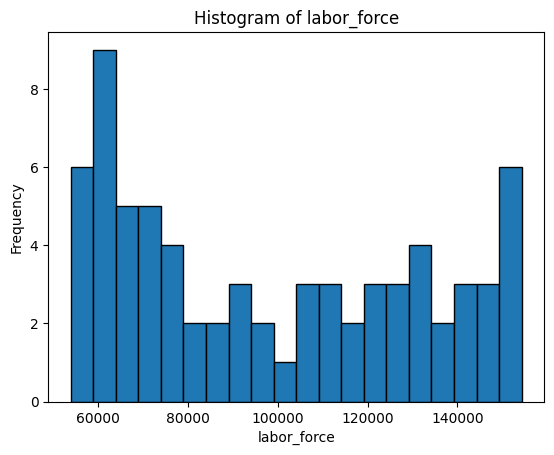

In [14]:
column_to_analyze = 'labor_force'
plt.hist(data[column_to_analyze], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('{}'.format(column_to_analyze))
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_to_analyze))
plt.show()

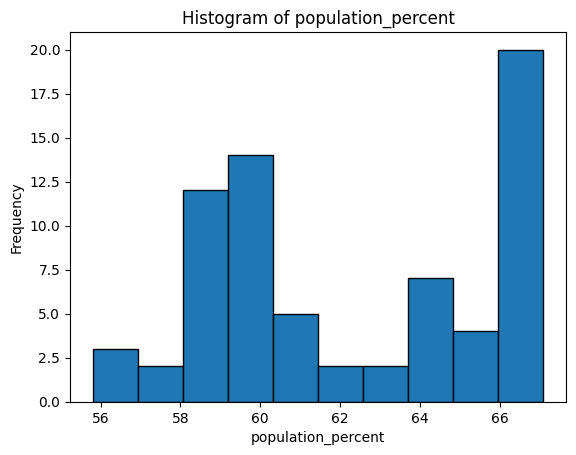

In [15]:
column_to_analyze = 'population_percent'
plt.hist(data[column_to_analyze], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('{}'.format(column_to_analyze))
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_to_analyze))
plt.show()

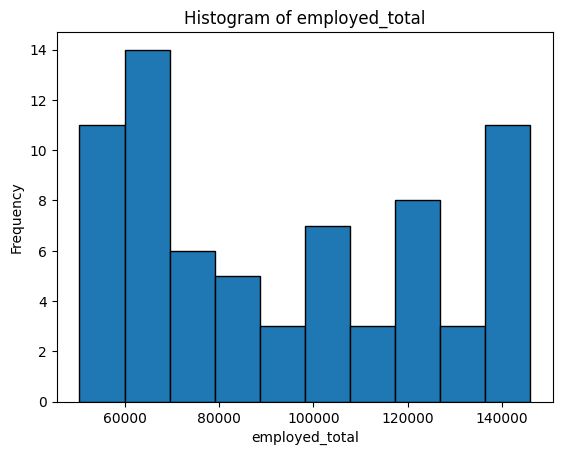

In [16]:
column_to_analyze = 'employed_total'
plt.hist(data[column_to_analyze], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('{}'.format(column_to_analyze))
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_to_analyze))
plt.show()

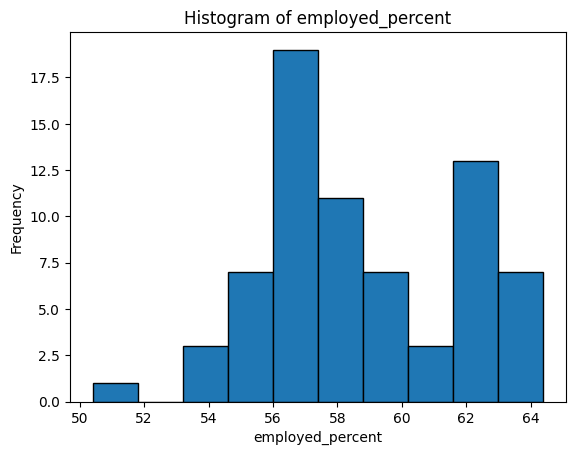

In [17]:
column_to_analyze = 'employed_percent'
plt.hist(data[column_to_analyze], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('{}'.format(column_to_analyze))
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_to_analyze))
plt.show()

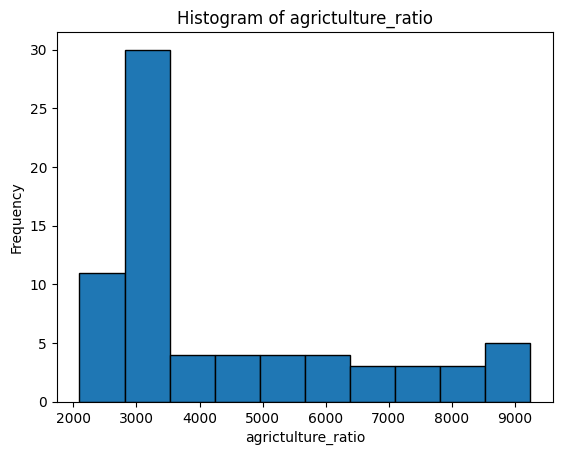

In [18]:
column_to_analyze = 'agrictulture_ratio'
plt.hist(data[column_to_analyze], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('{}'.format(column_to_analyze))
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_to_analyze))
plt.show()

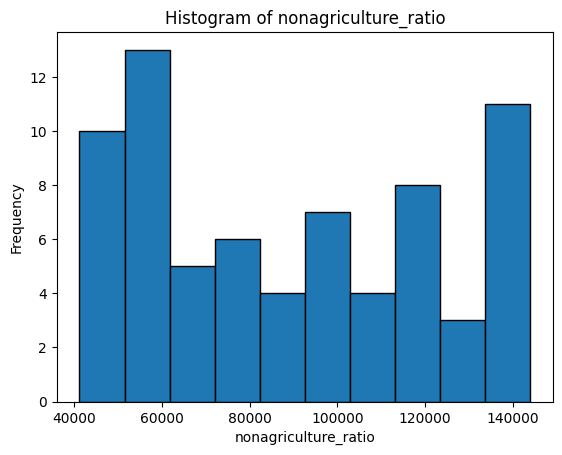

In [19]:
column_to_analyze = 'nonagriculture_ratio'
plt.hist(data[column_to_analyze], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('{}'.format(column_to_analyze))
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_to_analyze))
plt.show()

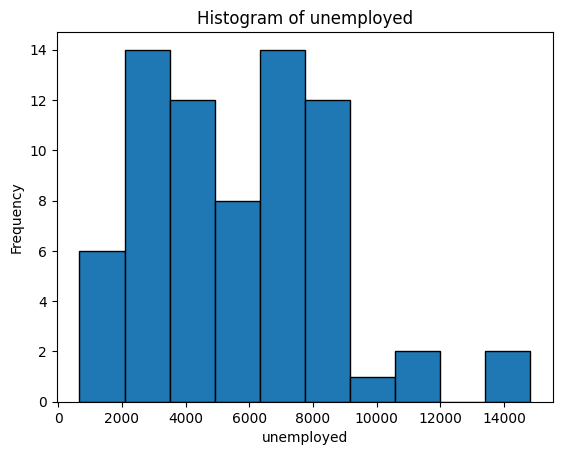

In [20]:
column_to_analyze = 'unemployed'
plt.hist(data[column_to_analyze], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('{}'.format(column_to_analyze))
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_to_analyze))
plt.show()

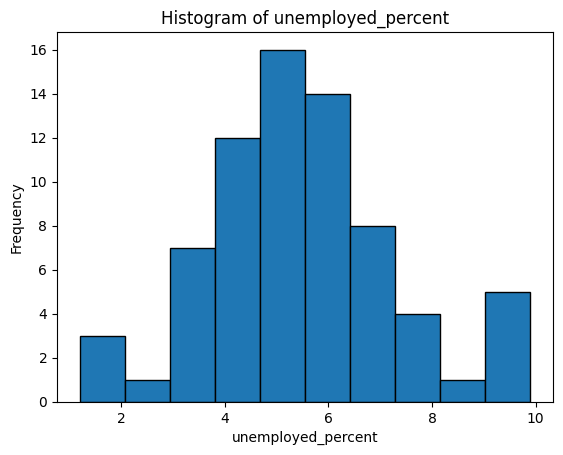

In [21]:
column_to_analyze = 'unemployed_percent'
plt.hist(data[column_to_analyze], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('{}'.format(column_to_analyze))
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_to_analyze))
plt.show()

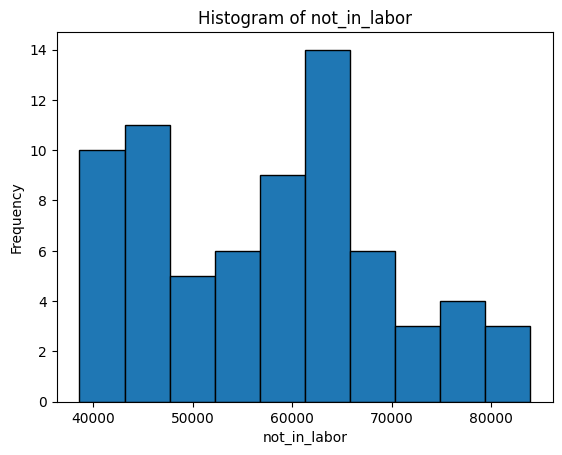

In [22]:
column_to_analyze = 'not_in_labor'
plt.hist(data[column_to_analyze], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('{}'.format(column_to_analyze))
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_to_analyze))
plt.show()

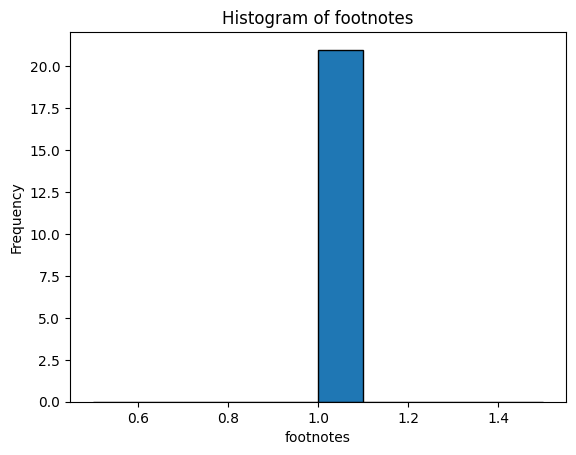

In [23]:
column_to_analyze = 'footnotes'
plt.hist(data[column_to_analyze], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('{}'.format(column_to_analyze))
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_to_analyze))
plt.show()

# Data Preprocessing

Fixing the typo agrictulture_ratio

In [26]:
data.rename(columns={'agrictulture_ratio': 'agriculture_ratio'}, inplace=True)
data.head()

,year,population,labor_force,population_percent,employed_total,employed_percent,agriculture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990,NaN
1,1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230,NaN
2,1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100,NaN
3,1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590,NaN
4,1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230,NaN


# Data Analysis

In [24]:
#1
#2
#3

### 1. US Population, total Employment, and total Unemployment throughout the year.

Text(0.5, 1.0, 'US Population, total Employment, and total Unemployment throughout the year')

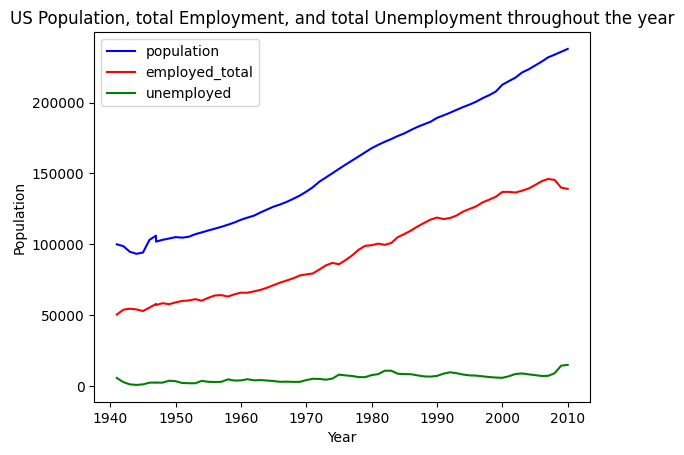

In [33]:
fig, ax1 = plt.subplots()  # Primary y-axis (left)

ax1.plot(data['year'], data['population'], 'b-', label='population')
ax1.plot(data['year'], data['employed_total'], 'r-', label='employed_total')
ax1.plot(data['year'], data['unemployed'], 'g-', label='unemployed')

ax1.set_xlabel('Year')
ax1.set_ylabel('Population')
ax1.legend(loc='upper left')
plt.title('US Population, total Employment, and total Unemployment throughout the year')

### 2. Employment Composition in the US

#### 2.1 Average composition

#### 2.2 Employment Composition throughout the year

### 3. Footnotes Analysis